# The *k*-means clustering algorithm

In this Notebook we will carry out some practical exercises to see the *k*-means algorithm in action. You should spend around an hour and a half on this Notebook.

The *k*-means algorithm has been implemented in Python in the `KMeans` class from the `sklearn` library. In this Notebook we will use the Python `KMeans` implementation on the example data given in Section 2 of Part 21.

In [1]:
# Standard imports

import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

/usr/local/lib/python3.4/dist-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


To start, we will import the `sklearn.cluster` library, which contains the `KMeans` class. We will also use the same dataset that we used in Part 21:

In [2]:
from sklearn import cluster

The first example we looked at, in Exercise 21.1, was the data from the 2013-2014 English football premier league table. This data is in the file `football_results.csv`. As before, we will import this data from the CSV file into a DataFrame:

In [3]:
footballResults_df = pd.read_csv('data/football_results.csv', index_col=0)
footballResults_df.head()

,For,Against,Position
Team,,,
Arsenal,68,41,4
Aston Villa,39,61,15
Cardiff City,32,74,20
Chelsea,71,27,3
Crystal Palace,33,48,11


To visualise the data, we can do a simple scatter plot of the `For` and `Against` columns.

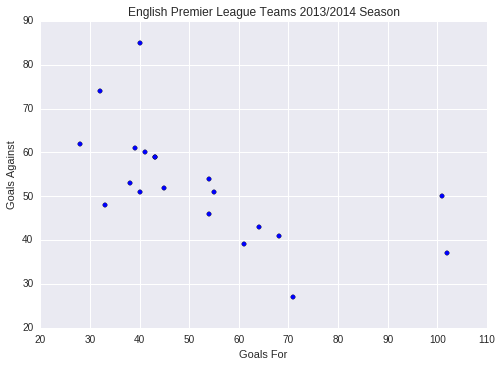

In [4]:
plt.scatter(footballResults_df['For'],
            footballResults_df['Against'])

plt.xlabel('Goals For')
plt.ylabel('Goals Against')

plt.title('English Premier League Teams 2013/2014 Season')

Now, let's see what happens when we apply a clustering algorithm. As in the original exercise, we can try a number of different values of *k*. We will start with *k*=2.

To use the *k*-means clusterer, we first need to create an instance of the clusterer. When we create the object, the value of *k* is specified with the `n_clusters` parameter:

In [5]:
# Create an instance of the clusterer with k=2
kmeans2 = cluster.KMeans(n_clusters=2)

Unlike the *k*-nearest neighbours algorithm, we do not need a set of labelled training data. Rather, the only input to the algorithm is the set of data points. In this case, the data is the `For` and `Against` columns of the the `footballResults_df` DataFrame:

In [6]:
clusteringData_df = footballResults_df[['For', 'Against']]
clusteringData_df.head()

,For,Against
Team,,
Arsenal,68,41
Aston Villa,39,61
Cardiff City,32,74
Chelsea,71,27
Crystal Palace,33,48


We can now run the *k*-means algorithm with *k*=2 on this data. The `fit` method returns an object which we can use to obtain the assigned clusters:

In [7]:
# Call the fit function on the clusterer to fit the data to the 2 means.
assignedClusters_clust = kmeans2.fit(clusteringData_df)

The object `assignedClusters_clust` has an attribute `labels_`, which is an array of the clusters that each data point has been assigned to:

In [8]:
assignedClusters_clust.labels_

array([1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

We asked for *k*=2, so the points are labelled either 0 or 1.

We can now use this array to show how the *k*-means algorithm assigned the points to different clusters. We will plot the points in cluster `0` in red, and the points in cluster `1` in blue:

[]

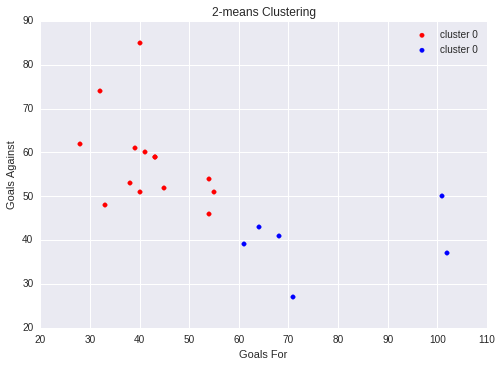

In [9]:
# Plot the data points which in the cluster labelled '0'
plt.scatter(footballResults_df['For'][assignedClusters_clust.labels_==0],
            footballResults_df['Against'][assignedClusters_clust.labels_==0],
            color='red', marker='o', label='cluster 0')

# Plot the data points which in the cluster labelled '1'
plt.scatter(footballResults_df['For'][assignedClusters_clust.labels_==1],
            footballResults_df['Against'][assignedClusters_clust.labels_==1],
            color='blue', marker='o', label='cluster 0')

plt.legend()

plt.xlabel('Goals For')
plt.ylabel('Goals Against')

plt.title('2-means Clustering')

plt.plot()

To draw a comparison with *k*-means for *k*=3, we can carry out a similar experiment:

In [10]:
# First, create an instance of the clusterer with k=3
kmeans3 = cluster.KMeans(n_clusters=3)

# Then call the fit function on the clusterer to fit the data to the 3 means.
assignedClusters_clust = kmeans3.fit(clusteringData_df)

# And see how the data points have been assigned to clusters:
assignedClusters_clust.labels_

array([0, 1, 1, 0, 1, 0, 1, 1, 2, 2, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1])

As we have now clustered into three clusters, rather than two, the points are given labels of either 0, 1 or 2.

As before, we can use the assigned clusters to show the different clusters. We will plot the points in cluster `0` in red, cluster `1` in blue, and the points in cluster `2` in (light) green:

[]

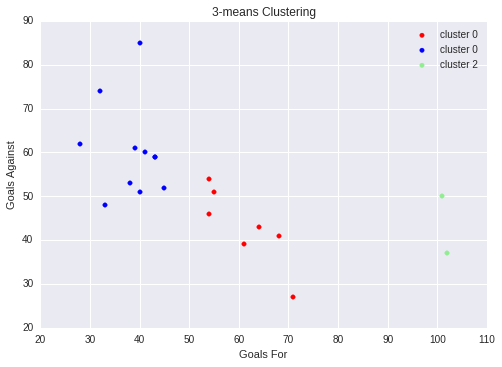

In [11]:
# Plot the data points which in the cluster labelled '0'
plt.scatter(footballResults_df['For'][assignedClusters_clust.labels_==0],
            footballResults_df['Against'][assignedClusters_clust.labels_==0],
            color='red', marker='o', label='cluster 0')

# Plot the data points which in the cluster labelled '1'
plt.scatter(footballResults_df['For'][assignedClusters_clust.labels_==1],
            footballResults_df['Against'][assignedClusters_clust.labels_==1],
            color='blue', marker='o', label='cluster 0')

# Plot the data points which in the cluster labelled '2'
plt.scatter(footballResults_df['For'][assignedClusters_clust.labels_==2],
            footballResults_df['Against'][assignedClusters_clust.labels_==2],
            color='lightGreen', marker='o', label='cluster 2')

plt.legend()

plt.xlabel('Goals For')
plt.ylabel('Goals Against')

plt.title('3-means Clustering')

plt.plot()

To see what values were eventually chosen as the centroids, we can use the `cluster_centers_` attribute which is defined on the trained `kmeans3` object (note that this returns a `numpy.array` rather than a *pandas* object):

In [12]:
kmeans3.cluster_centers_

array([[  61.        ,   43.        ],
       [  38.36363636,   60.36363636],
       [ 101.5       ,   43.5       ]])

To see where these appear on the graph, we can add them to the plot:

[]

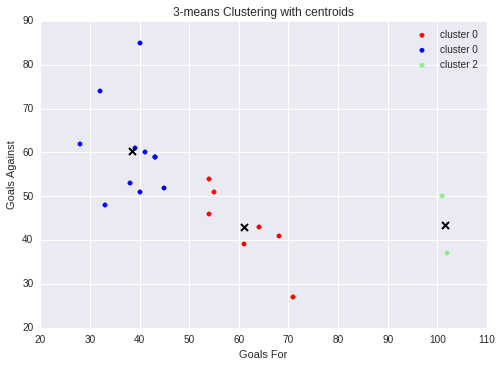

In [13]:
# Plot the data points which in the cluster labelled '0'
plt.scatter(footballResults_df['For'][assignedClusters_clust.labels_==0],
            footballResults_df['Against'][assignedClusters_clust.labels_==0],
            color='red', marker='o', label='cluster 0')

# Plot the data points which in the cluster labelled '1'
plt.scatter(footballResults_df['For'][assignedClusters_clust.labels_==1],
            footballResults_df['Against'][assignedClusters_clust.labels_==1],
            color='blue', marker='o', label='cluster 0')

# Plot the data points which in the cluster labelled '2'
plt.scatter(footballResults_df['For'][assignedClusters_clust.labels_==2],
            footballResults_df['Against'][assignedClusters_clust.labels_==2],
            color='lightGreen', marker='o', label='cluster 2')

# Plot each of the centroids:
for (cx, cy) in assignedClusters_clust.cluster_centers_:
    plt.plot(cx, cy, color='black', marker='x', mew=2)

plt.legend()

plt.xlabel('Goals For')
plt.ylabel('Goals Against')

plt.title('3-means Clustering with centroids')

plt.plot()

The three crosses represent the three centroids, and each point in the graph is assigned a class depending on which of the three centroids it is closest to. (The `mew=2` parameter increases the thickness of the crosses, making them more visible.)

## What next?

You have now completed this Notebook. In the next Notebook we will look at how *k*-means can give different clusters depending on the initial values chosen in the algorithm. Go to the next Notebook now: [`21.2 k-means clustering - choosing initial values`](21.2 k-means clustering - choosing initial values.ipynb).